This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()                   # practice in class
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6048 - accuracy: 0.8125 - val_loss: 0.2558 - val_accuracy: 0.9242
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2507 - accuracy: 0.9218 - val_loss: 0.2575 - val_accuracy: 0.9233
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1635 - accuracy: 0.9496 - val_loss: 0.1559 - val_accuracy: 0.9532
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1174 - accuracy: 0.9633 - val_loss: 0.1462 - val_accuracy: 0.9558
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0867 - accuracy: 0.9730 - val_loss: 0.1288 - val_accuracy: 0.9628
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0627 - accuracy: 0.9801 - val_loss: 0.1359 - val_accuracy: 0.9607
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.1271 - val_accuracy: 0.9649
Epoch 

**Plotting a validation accuracy comparison**

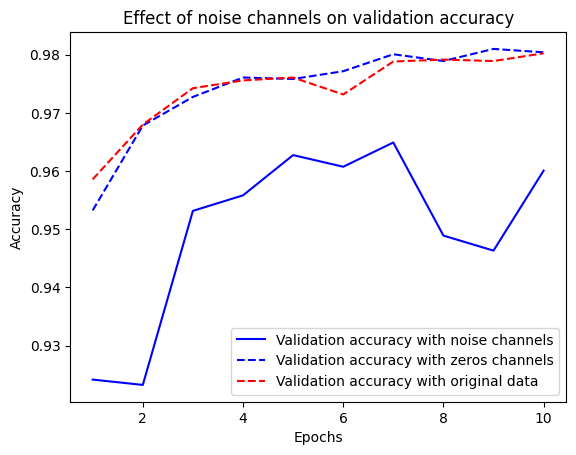

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]   # practice in class

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",                     # practice in class
         label="Validation accuracy with original data")

plt.plot()
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3150 - accuracy: 0.1050 - val_loss: 2.3050 - val_accuracy: 0.1007
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2996 - accuracy: 0.1165 - val_loss: 2.3098 - val_accuracy: 0.1023
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2924 - accuracy: 0.1253 - val_loss: 2.3222 - val_accuracy: 0.1028
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2797 - accuracy: 0.1383 - val_loss: 2.3264 - val_accuracy: 0.1006
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2643 - accuracy: 0.1481 - val_loss: 2.3340 - val_accuracy: 0.1049
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2441 - accuracy: 0.1659 - val_loss: 2.3508 - val_accuracy: 0.1000
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2205 - accuracy: 0.1785 - val_loss: 2.3741 - val_accuracy: 0.1037

practice in class

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_shuff = model.fit(
    train_images, random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3166 - accuracy: 0.1058 - val_loss: 2.3045 - val_accuracy: 0.1039
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2993 - accuracy: 0.1167 - val_loss: 2.3114 - val_accuracy: 0.1062
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2915 - accuracy: 0.1261 - val_loss: 2.3179 - val_accuracy: 0.0986
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2791 - accuracy: 0.1386 - val_loss: 2.3262 - val_accuracy: 0.0991
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2644 - accuracy: 0.1530 - val_loss: 2.3338 - val_accuracy: 0.1035
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2449 - accuracy: 0.1650 - val_loss: 2.3454 - val_accuracy: 0.0954
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2221 - accuracy: 0.1819 - val_loss: 2.3608 - val_accuracy: 0.0985

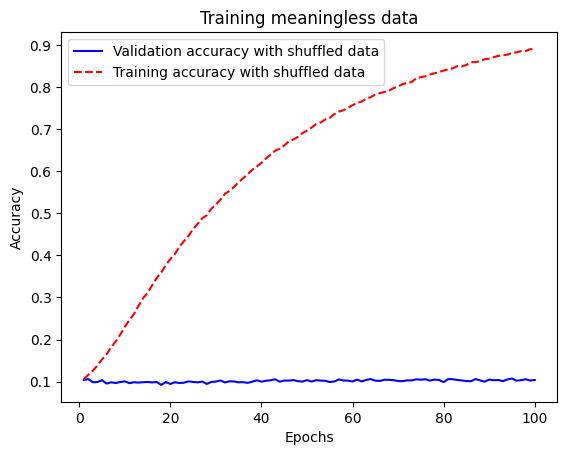

In [14]:
import matplotlib.pyplot as plt
val_acc_shuff = history_shuff.history["val_accuracy"]
train_acc_shuff = history_shuff.history["accuracy"]

epochs = range(1, 101)

plt.plot(epochs, val_acc_shuff, "b-",
         label="Validation accuracy with shuffled data")
plt.plot(epochs, train_acc_shuff, "r--",
         label="Training accuracy with shuffled data")

plt.plot()
plt.title("Training meaningless data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 537.1330 - accuracy: 0.2835 - val_loss: 2.3265 - val_accuracy: 0.1987
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1685 - accuracy: 0.1923 - val_loss: 2.1471 - val_accuracy: 0.1849
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4579 - accuracy: 0.1886 - val_loss: 2.2722 - val_accuracy: 0.1774
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3641 - accuracy: 0.1776 - val_loss: 2.2188 - val_accuracy: 0.1877
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3266 - accuracy: 0.1781 - val_loss: 2.2288 - val_accuracy: 0.1578
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3061 - accuracy: 0.1867 - val_loss: 2.0741 - val_accuracy: 0.1959
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3066 - accuracy: 0.1884 - val_loss: 2.1813 - val_accuracy: 0.1844
Epoc

**The same model with a more appropriate learning rate**

In [16]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3516 - accuracy: 0.9116 - val_loss: 0.1309 - val_accuracy: 0.9617
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1272 - accuracy: 0.9645 - val_loss: 0.1332 - val_accuracy: 0.9687
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1012 - accuracy: 0.9737 - val_loss: 0.1452 - val_accuracy: 0.9647
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9793 - val_loss: 0.1735 - val_accuracy: 0.9671
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0741 - accuracy: 0.9817 - val_loss: 0.1657 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0655 - accuracy: 0.9843 - val_loss: 0.1920 - val_accuracy: 0.9696
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0563 - accuracy: 0.9866 - val_loss: 0.1753 - val_accuracy: 0.9738
Epoch 

practice in class

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2973 - accuracy: 0.9146 - val_loss: 0.1548 - val_accuracy: 0.9568
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9649 - val_loss: 0.1019 - val_accuracy: 0.9690
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9765 - val_loss: 0.0935 - val_accuracy: 0.9712
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.9829 - val_loss: 0.0858 - val_accuracy: 0.9738
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 0.0797 - val_accuracy: 0.9771
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.0751 - val_accuracy: 0.9777
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0250 - accuracy: 0.9932 - val_loss: 0.0810 - val_accuracy: 0.9773
Epoch 

In [19]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-5),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1.9823 - accuracy: 0.4423 - val_loss: 1.6059 - val_accuracy: 0.7140
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 1.3383 - accuracy: 0.7630 - val_loss: 1.0678 - val_accuracy: 0.8282
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.9293 - accuracy: 0.8276 - val_loss: 0.7580 - val_accuracy: 0.8606
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.7026 - accuracy: 0.8543 - val_loss: 0.5926 - val_accuracy: 0.8788
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.5768 - accuracy: 0.8707 - val_loss: 0.4995 - val_accuracy: 0.8898
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5020 - accuracy: 0.8821 - val_loss: 0.4427 - val_accuracy: 0.8972
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4533 - accuracy: 0.8899 - val_loss: 0.4049 - val_accuracy: 0.9026
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [29]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5763 - accuracy: 0.7628 - val_loss: 0.4414 - val_accuracy: 0.8556
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3685 - accuracy: 0.8791 - val_loss: 0.3485 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2724 - accuracy: 0.9103 - val_loss: 0.2940 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2205 - accuracy: 0.9259 - val_loss: 0.2944 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1830 - accuracy: 0.9390 - val_loss: 0.2833 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1548 - accuracy: 0.9501 - val_loss: 0.2793 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1353 - accuracy: 0.9561 - val_loss: 0.2974 - val_accuracy: 0.8841
Epoch 8/20
30

**Version of the model with lower capacity**

In [22]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 78ms/step - loss: 0.6208 - accuracy: 0.6613 - val_loss: 0.5683 - val_accuracy: 0.6723
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5180 - accuracy: 0.8161 - val_loss: 0.5042 - val_accuracy: 0.8631
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4540 - accuracy: 0.8789 - val_loss: 0.4527 - val_accuracy: 0.8736
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3911 - accuracy: 0.9104 - val_loss: 0.4013 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3278 - accuracy: 0.9323 - val_loss: 0.3578 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2710 - accuracy: 0.9427 - val_loss: 0.3271 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2279 - accuracy: 0.9491 - val_loss: 0.3047 - val_accuracy: 0.8893
Epoch 8/20
30

**Version of the model with higher capacity**

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5641 - accuracy: 0.7154 - val_loss: 0.3829 - val_accuracy: 0.8330
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3339 - accuracy: 0.8613 - val_loss: 0.2912 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2374 - accuracy: 0.9048 - val_loss: 0.3199 - val_accuracy: 0.8661
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1882 - accuracy: 0.9255 - val_loss: 0.2942 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1397 - accuracy: 0.9475 - val_loss: 0.2888 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1029 - accuracy: 0.9643 - val_loss: 0.3450 - val_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0793 - accuracy: 0.9741 - val_loss: 0.5659 - val_accuracy: 0.8435
Epoch 8/20
30

practice in class

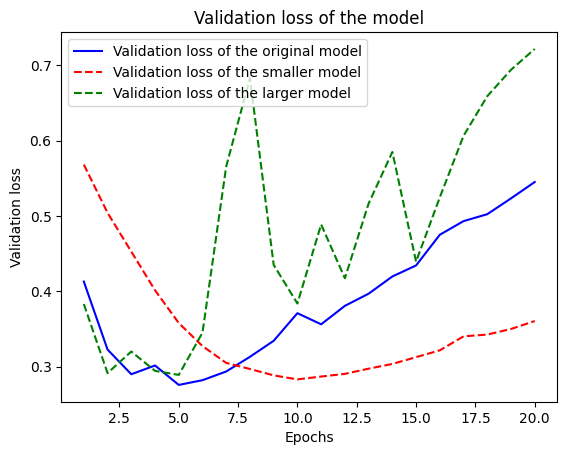

In [25]:
import matplotlib.pyplot as plt
val_loss_orig = history_original.history["val_loss"]
val_loss__small = history_smaller_model.history["val_loss"]
val_loss__large = history_larger_model.history["val_loss"]

epochs = range(1, 21)

plt.plot(epochs, val_loss_orig, "b-",
         label="Validation loss of the original model")
plt.plot(epochs, val_loss__small, "r--",
         label="Validation loss of the smaller model")
plt.plot(epochs, val_loss__large, "g--",
         label="Validation loss of the larger model")

plt.plot()
plt.title("Validation loss of the model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [30]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6626 - accuracy: 0.5957 - val_loss: 0.5913 - val_accuracy: 0.7844
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5753 - accuracy: 0.7103 - val_loss: 0.4808 - val_accuracy: 0.8628
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4966 - accuracy: 0.7710 - val_loss: 0.4188 - val_accuracy: 0.8748
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4336 - accuracy: 0.8123 - val_loss: 0.3384 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3767 - accuracy: 0.8504 - val_loss: 0.3081 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3326 - accuracy: 0.8746 - val_loss: 0.2973 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2951 - accuracy: 0.8949 - val_loss: 0.2929 - val_accuracy: 0.8862
Epoch 8/20
30

practice in class

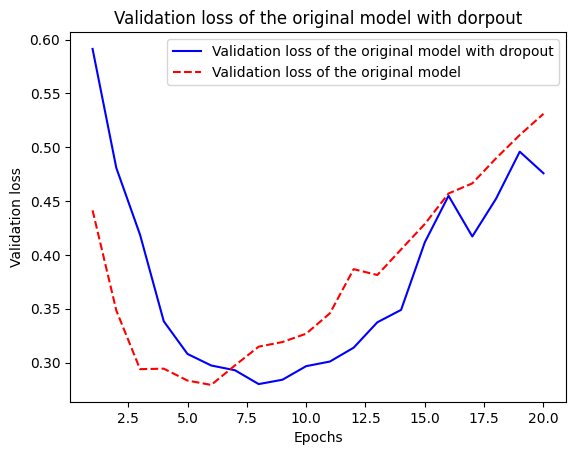

In [32]:
import matplotlib.pyplot as plt
val_loss_orig_dropout = history_dropout.history["val_loss"]
val_loss_orig = history_original.history["val_loss"]

epochs = range(1, 21)

plt.plot(epochs, val_loss_orig_dropout, "b-",
         label="Validation loss of the original model with dropout")
plt.plot(epochs, val_loss_orig, "r--",
         label="Validation loss of the original model")

plt.plot()
plt.title("Validation loss of the original model with dorpout")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

## Summary